<img SRC="img2.jpg"/>
<center><h1 Style="color:#7FFF00">Análisis de Datos</h1></center>
<center><h3>Universidad Castro Carazo</h3></center>
<center><h6>II Cuatrimestre, 2022</h6></center>
</br>
<p Style=”text-aling: justify”> En el siguiente notebook se presenta un análisis de información relacionada con materia del cambio climático en Costa Rica. 

El próposito del mismo es el estudiar y analizar datos sobre el consumo eléctrico en nuestro país por parte de diferentes sectores en los últimos años. La inquietud nace con la finalidad de examinar cuales son los sectores que demandan un mayor consumo energético, esto con el objetivo de conocer y medir el avance en el cumplimiento de las metas climáticas de Costa Rica, las cuales se reflejan en la Estrategia Nacional de Cambio Climático y sus políticas. 
Al conocer dicha información se facilita la toma de decisiones sobre posibles medidas políticas, económicas y caracter social en estos sectores, para poder seguir trabajando en el proceso de mitigación de los efectos sobre el cambio climático en suelo costarricense.</p>
</b
</br>
<a href="http://sinamecc.opendata.junar.com/visualizations/34799/total-generacion-electrica-en-costa-rica-por-tipo-de-fuente-tj-2010-2019/">Fuente de datos para el análisis extraída desde la página oficial de SINAMECC:</a>

<h2 Style="color: #DC143C"> 1. Carga y estandarización de los sets de datos.</h2>

<p>¿Qué se hace en esta etapa?</p>

<ol>
    <li>Importar librerías.</li>
    <li>Importar los sets de datos.</li>
    <li>Revisar encabezados de los DataFrames.</li>
    <li>Si hay más de un set de datos - unirlos en un solo DF.</li>
</ol>
    
<h3 Style="color: #008B8B"> 1.1 Importación de librería:</h3>

In [11]:
import pandas as pd              
import numpy as np               
import matplotlib.pyplot as ptl

<h3 Style="color: #008B8B"> 1.2. Importar set de datos:</h3>

In [12]:
cols = ["descripcion", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]

df_energia = pd.read_csv("balance.csv", names=cols)


In [13]:
df_energia.shape


(10, 10)

In [14]:
df_energia.head(5)


,descripcion,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Consumo final total,152180,150782,154301,156069,157966,164134,173415,176835,176935
2,Residencial,23382,22139,21586,21366,20603,20791,20620,20652,19481
3,Servicios,6146,6087,6206,6246,6417,6671,7042,7175,7303
4,Comercial,3513,3479,3636,3870,3980,4114,4306,4322,4464


In [15]:
df_energia.tail(5)

,descripcion,2010,2011,2012,2013,2014,2015,2016,2017,2018
5,Público,3869,3951,4230,4296,4454,4575,4687,4690,4803
6,Transporte,70319,72109,74111,74637,76186,81526,87538,89061,91231
7,Industria,37995,36973,37740,38994,39206,38368,39728,40047,39262
8,Agropecuario,2854,3092,3242,3273,3254,3327,3584,3761,3337
9,Consumo no identificado (otros),?,1106,955,1008,1281,1346,1364,1493,1430


A continuación se muestran datos estadísticos descriptivos generales:

In [16]:
df_energia.describe()

,2011,2012,2013,2014,2015,2016,2017,2018
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,30172.900000,30801.900000,31177.200000,31536.100000,32686.700000,34430.000000,35005.300000,35026.400000
std,48036.573732,49203.692326,49747.473769,50406.176697,52605.368231,55771.141711,56854.233543,57150.094127
min,1106.000000,955.000000,1008.000000,1281.000000,1346.000000,1364.000000,1493.000000,1430.000000
25%,3188.750000,3340.500000,3422.250000,3435.500000,3523.750000,3764.500000,3901.250000,3618.750000
50%,5019.000000,5218.000000,5271.000000,5435.500000,5623.000000,5864.500000,5932.500000,6053.000000
75%,33264.500000,33701.500000,34587.000000,34555.250000,33973.750000,34951.000000,35198.250000,34316.750000
max,150782.000000,154301.000000,156069.000000,157966.000000,164134.000000,173415.000000,176835.000000,176935.000000


<h3 Style="color: #008B8B"> 1.3. Revisar encabezados de los Dataframes:</h3>


In [17]:
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   descripcion  10 non-null     object
 1   2010         10 non-null     object
 2   2011         10 non-null     int64 
 3   2012         10 non-null     int64 
 4   2013         10 non-null     int64 
 5   2014         10 non-null     int64 
 6   2015         10 non-null     int64 
 7   2016         10 non-null     int64 
 8   2017         10 non-null     int64 
 9   2018         10 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 928.0+ bytes


In [18]:
df_energia.columns

Index(['descripcion', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object')

<h3 Style="color: #008B8B"> 1.4. Si hay más de un set de datos - unirlos en un solo DF:</h3>

En este caso no aplica este paso, debido a que solo hay presencia de un set de datos.

<h2 Style="color: #DC143C"> 2. Manejo de valores faltantes o perdidos</h2>

<p>¿Qué se hace en esta etapa?</p>

<ol>
    <li>Identificar cómo se muestran los valores faltantes (null/espacio en blanco o vacío/?) y estandarizarlos (NaN - Not a Number).</li>
    <li>Anális de imputación para datos numéricos(promedio, para que no genere Desv Stan).</li>
    <li>Anális de imputación para datos caracter(valor más frecuente / ML).</li>
    <li>Eliminan filas o columnas con valores faltantes.</li>
</ol>
    
<h3 Style="color: #008B8B"> 2.1 Identificar cómo se muestran los valores faltantes (null / espacio en blanco o vacío / ?) y estandarizarlos (NaN - Not a Number).
    Paso 1:</h3>

In [19]:
df_energia.head(5)

,descripcion,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Consumo final total,152180,150782,154301,156069,157966,164134,173415,176835,176935
2,Residencial,23382,22139,21586,21366,20603,20791,20620,20652,19481
3,Servicios,6146,6087,6206,6246,6417,6671,7042,7175,7303
4,Comercial,3513,3479,3636,3870,3980,4114,4306,4322,4464


In [20]:
df_energia.tail(5)

,descripcion,2010,2011,2012,2013,2014,2015,2016,2017,2018
5,Público,3869,3951,4230,4296,4454,4575,4687,4690,4803
6,Transporte,70319,72109,74111,74637,76186,81526,87538,89061,91231
7,Industria,37995,36973,37740,38994,39206,38368,39728,40047,39262
8,Agropecuario,2854,3092,3242,3273,3254,3327,3584,3761,3337
9,Consumo no identificado (otros),?,1106,955,1008,1281,1346,1364,1493,1430


In [21]:
df_energia.replace("?", np.nan, inplace = True)
df_energia.head(10)

,descripcion,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Consumo final total,152180,150782,154301,156069,157966,164134,173415,176835,176935
2,Residencial,23382,22139,21586,21366,20603,20791,20620,20652,19481
3,Servicios,6146,6087,6206,6246,6417,6671,7042,7175,7303
4,Comercial,3513,3479,3636,3870,3980,4114,4306,4322,4464
5,Público,3869,3951,4230,4296,4454,4575,4687,4690,4803
6,Transporte,70319,72109,74111,74637,76186,81526,87538,89061,91231
7,Industria,37995,36973,37740,38994,39206,38368,39728,40047,39262
8,Agropecuario,2854,3092,3242,3273,3254,3327,3584,3761,3337
9,Consumo no identificado (otros),NaN,1106,955,1008,1281,1346,1364,1493,1430


<h3 Style="color: #008B8B"> 2.1 Paso 2: Contar valores faltantes por columna.</h3>

In [22]:
valoresPerdidos = df_energia.isnull()

In [23]:
valoresPerdidos.head(5)

,descripcion,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [273]:
for column in valoresPerdidos.columns.values.tolist():
    print(column)
    print(valoresPerdidos[column].value_counts())
    print ("")

descripcion
False    11
Name: descripcion, dtype: int64

2010
False    10
True      1
Name: 2010, dtype: int64

2011
False    11
Name: 2011, dtype: int64

2012
False    11
Name: 2012, dtype: int64

2013
False    11
Name: 2013, dtype: int64

2014
False    11
Name: 2014, dtype: int64

2015
False    11
Name: 2015, dtype: int64

2016
False    11
Name: 2016, dtype: int64

2017
False    11
Name: 2017, dtype: int64

2018
False    11
Name: 2018, dtype: int64



<h3 Style="color: #008B8B"> 2.2 Anális de imputación para datos numéricos</h3>

In [24]:
avg_consumo_no_identificado = 1247.8

print ('La media de la fila consumo no identificado es: ', avg_consumo_no_identificado )

La media de la fila consumo no identificado es:  1247.8


In [25]:
df_energia["2010"].replace(np.nan, 1247.8, inplace=True)

In [26]:
df_energia.tail(5)

,descripcion,2010,2011,2012,2013,2014,2015,2016,2017,2018
5,Público,3869,3951,4230,4296,4454,4575,4687,4690,4803
6,Transporte,70319,72109,74111,74637,76186,81526,87538,89061,91231
7,Industria,37995,36973,37740,38994,39206,38368,39728,40047,39262
8,Agropecuario,2854,3092,3242,3273,3254,3327,3584,3761,3337
9,Consumo no identificado (otros),1247.8,1106,955,1008,1281,1346,1364,1493,1430


<h3 Style="color: #008B8B"> 2.4 Imputar datos tipo caracter</h3>

En este caso no existen datos a imputar, debido a que no hay valores tipo caracter faltantes. 

In [27]:
df_energia.head(5)

,descripcion,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Consumo final total,152180,150782,154301,156069,157966,164134,173415,176835,176935
2,Residencial,23382,22139,21586,21366,20603,20791,20620,20652,19481
3,Servicios,6146,6087,6206,6246,6417,6671,7042,7175,7303
4,Comercial,3513,3479,3636,3870,3980,4114,4306,4322,4464


In [28]:
df_energia['descripcion'].value_counts() 

Descripción                        1
Consumo final total                1
Residencial                        1
Servicios                          1
Comercial                          1
Público                            1
Transporte                         1
Industria                          1
Agropecuario                       1
Consumo no identificado (otros)    1
Name: descripcion, dtype: int64

In [29]:
df_energia["descripcion"].value_counts().idxmax() 

'Descripción'

In [297]:
valoresPerdidos = df_energia.isnull()

for column in valoresPerdidos.columns.values.tolist():
    print(column)
    print(valoresPerdidos[column].value_counts())
    print ("")

descripcion
False    11
Name: descripcion, dtype: int64

2010
False    11
Name: 2010, dtype: int64

2011
False    11
Name: 2011, dtype: int64

2012
False    11
Name: 2012, dtype: int64

2013
False    11
Name: 2013, dtype: int64

2014
False    11
Name: 2014, dtype: int64

2015
False    11
Name: 2015, dtype: int64

2016
False    11
Name: 2016, dtype: int64

2017
False    11
Name: 2017, dtype: int64

2018
False    11
Name: 2018, dtype: int64



<h3 Style="color: #008B8B"> 2.5 Eliminar filas con valores faltantes</h3>

El data set no cuenta con valores faltantes, debido que al tratarse de un tema de medición de consumo, 0 brinda información, en este caso de no consumo o no gasto. 

In [30]:
df_energia

,descripcion,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Consumo final total,152180,150782,154301,156069,157966,164134,173415,176835,176935
2,Residencial,23382,22139,21586,21366,20603,20791,20620,20652,19481
3,Servicios,6146,6087,6206,6246,6417,6671,7042,7175,7303
4,Comercial,3513,3479,3636,3870,3980,4114,4306,4322,4464
5,Público,3869,3951,4230,4296,4454,4575,4687,4690,4803
6,Transporte,70319,72109,74111,74637,76186,81526,87538,89061,91231
7,Industria,37995,36973,37740,38994,39206,38368,39728,40047,39262
8,Agropecuario,2854,3092,3242,3273,3254,3327,3584,3761,3337
9,Consumo no identificado (otros),1247.8,1106,955,1008,1281,1346,1364,1493,1430


In [160]:
valoresPerdidos = df_energia.isnull()

for column in valoresPerdidos.columns.values.tolist():
    print(column)
    print(valoresPerdidos[column].value_counts())
    print ("")

descripcion
False    84
Name: descripcion, dtype: int64

2010
False    84
Name: 2010, dtype: int64

2011
False    84
Name: 2011, dtype: int64

2012
False    84
Name: 2012, dtype: int64

2013
False    84
Name: 2013, dtype: int64

2014
False    84
Name: 2014, dtype: int64

2015
False    84
Name: 2015, dtype: int64

2016
False    84
Name: 2016, dtype: int64

2017
False    84
Name: 2017, dtype: int64

2018
False    84
Name: 2018, dtype: int64



<h2 Style="color: #DC143C"> 3. Estandarización de datos</h2>

<p>¿Qué se hace en esta etapa?</p>

<ol>
    <li>Verificar el dominio de las variables y se ajusta de ser necesario.</li>
    <li>Convertir valores en función de la interpretación.</li>
    <li>Normalizar los datos para que sus valores queden entre 0 y 1.</li>
    <li>Agrupar datos (Binning).</li>
</ol>
    
<h3 Style="color: #008B8B"> 3.1 Verificar el dominio de las variables:</h3>

In [31]:
df_energia

,descripcion,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Consumo final total,152180,150782,154301,156069,157966,164134,173415,176835,176935
2,Residencial,23382,22139,21586,21366,20603,20791,20620,20652,19481
3,Servicios,6146,6087,6206,6246,6417,6671,7042,7175,7303
4,Comercial,3513,3479,3636,3870,3980,4114,4306,4322,4464
5,Público,3869,3951,4230,4296,4454,4575,4687,4690,4803
6,Transporte,70319,72109,74111,74637,76186,81526,87538,89061,91231
7,Industria,37995,36973,37740,38994,39206,38368,39728,40047,39262
8,Agropecuario,2854,3092,3242,3273,3254,3327,3584,3761,3337
9,Consumo no identificado (otros),1247.8,1106,955,1008,1281,1346,1364,1493,1430


In [32]:
df_energia.dtypes

descripcion    object
2010           object
2011            int64
2012            int64
2013            int64
2014            int64
2015            int64
2016            int64
2017            int64
2018            int64
dtype: object

In [33]:
df_energia["2010"] = df_energia["2010"].astype("int")

In [34]:
df_energia.dtypes

descripcion    object
2010            int32
2011            int64
2012            int64
2013            int64
2014            int64
2015            int64
2016            int64
2017            int64
2018            int64
dtype: object

<h3 Style="color: #008B8B"> 3.2 Convertir valores en función de su interpretación</h3>

In [35]:
df_energia.head(5)

,descripcion,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Consumo final total,152180,150782,154301,156069,157966,164134,173415,176835,176935
2,Residencial,23382,22139,21586,21366,20603,20791,20620,20652,19481
3,Servicios,6146,6087,6206,6246,6417,6671,7042,7175,7303
4,Comercial,3513,3479,3636,3870,3980,4114,4306,4322,4464


En el set de datos no existen operaciones matemáticas a convertir.

<h3 Style="color: #008B8B">3.3 Normalizacion de Datos</h3>

In [36]:
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   descripcion  10 non-null     object
 1   2010         10 non-null     int32 
 2   2011         10 non-null     int64 
 3   2012         10 non-null     int64 
 4   2013         10 non-null     int64 
 5   2014         10 non-null     int64 
 6   2015         10 non-null     int64 
 7   2016         10 non-null     int64 
 8   2017         10 non-null     int64 
 9   2018         10 non-null     int64 
dtypes: int32(1), int64(8), object(1)
memory usage: 888.0+ bytes


In [56]:
dfTemp = df_energia[['2016', '2017', '2018']]
dfTemp.head(5)

,2016,2017,2018
0,0.011625,0.011406,0
1,1.000000,1.000000,1
2,0.118906,0.116787,0
3,0.040608,0.040575,0
4,0.024831,0.024441,0


In [57]:
df_energia['2016'] = df_energia['2016']/df_energia['2016'].max()
df_energia['2017'] = df_energia['2017']/df_energia['2017'].max()
df_energia['2018'] = df_energia['2018']/df_energia['2018'].max()


In [58]:
dfTemp = df_energia[['2016','2017', '2018']]
dfTemp.head(5)

,2016,2017,2018
0,0.011625,0.011406,0.0
1,1.000000,1.000000,1.0
2,0.118906,0.116787,0.0
3,0.040608,0.040575,0.0
4,0.024831,0.024441,0.0


<h3 Style="color: #008B8B">3.4 Binning</h3>

In [91]:
df_energia.head(5)

,descripcion,2010,2011,2012,2013,2014,2015,2016,2017,2018,2018-bins
0,Descripción,0.013208,0.013337,0.013039,2013,2014,2015,0.011625,0.011406,0,bajo
1,Consumo final total,1.000000,1.000000,1.000000,156069,157966,164134,1.000000,1.000000,1,alto
2,Residencial,0.153647,0.146828,0.139895,21366,20603,20791,0.118906,0.116787,0,bajo
3,Servicios,0.040386,0.040370,0.040220,6246,6417,6671,0.040608,0.040575,0,bajo
4,Comercial,0.023085,0.023073,0.023564,3870,3980,4114,0.024831,0.024441,0,bajo


In [60]:
df_energia[['2018']] = df_energia[["2018"]].astype("int")
df_energia.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   descripcion  10 non-null     object  
 1   2010         10 non-null     float64 
 2   2011         10 non-null     float64 
 3   2012         10 non-null     float64 
 4   2013         10 non-null     int64   
 5   2014         10 non-null     int64   
 6   2015         10 non-null     int64   
 7   2016         10 non-null     float64 
 8   2017         10 non-null     float64 
 9   2018         10 non-null     int32   
 10  2018-bins    10 non-null     category
dtypes: category(1), float64(5), int32(1), int64(3), object(1)
memory usage: 1.0+ KB


In [61]:
cat = np.linspace(min(df_energia['2018']), max(df_energia["2018"]), 4)
cat

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [62]:
nombres = ["bajo", "medio", "alto"]
df_energia["2018-bins"] = pd.cut(df_energia['2018'], bins = cat, labels = nombres, include_lowest=True)
df_energia[["2018", "2018-bins"]].head(5)

,2018,2018-bins
0,0,bajo
1,1,alto
2,0,bajo
3,0,bajo
4,0,bajo


In [63]:
df_energia["2018-bins"].value_counts()

bajo     9
alto     1
medio    0
Name: 2018-bins, dtype: int64

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

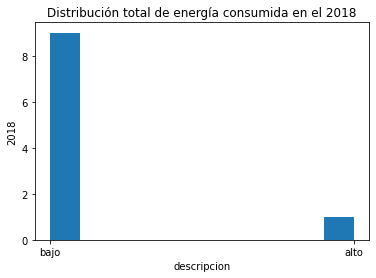

In [49]:
plt.hist(df_energia["2018-bins"])
plt.xlabel("descripcion")
plt.ylabel("2018")
plt.title("Distribución total de energía consumida en el 2018")
plt.show()

In [65]:
df_energia.head(10)

,descripcion,2010,2011,2012,2013,2014,2015,2016,2017,2018,2018-bins
0,Descripción,0.013208,0.013337,0.013039,2013,2014,2015,0.011625,0.011406,0,bajo
1,Consumo final total,1.000000,1.000000,1.000000,156069,157966,164134,1.000000,1.000000,1,alto
2,Residencial,0.153647,0.146828,0.139895,21366,20603,20791,0.118906,0.116787,0,bajo
3,Servicios,0.040386,0.040370,0.040220,6246,6417,6671,0.040608,0.040575,0,bajo
4,Comercial,0.023085,0.023073,0.023564,3870,3980,4114,0.024831,0.024441,0,bajo
5,Público,0.025424,0.026203,0.027414,4296,4454,4575,0.027028,0.026522,0,bajo
6,Transporte,0.462078,0.478233,0.480301,74637,76186,81526,0.504789,0.503639,0,bajo
7,Industria,0.249671,0.245208,0.244587,38994,39206,38368,0.229092,0.226465,0,bajo
8,Agropecuario,0.018754,0.020506,0.021011,3273,3254,3327,0.020667,0.021268,0,bajo
9,Consumo no identificado (otros),0.008194,0.007335,0.006189,1008,1281,1346,0.007866,0.008443,0,bajo


<h2 Style="color:#DC143C">4. Visualización de datos.</h2>

<p>¿Qué se hace en esta etapa?</p>

<ol>
    <li>Responder las preguntas de Negocio.</li>
    <li>Liberar conocimiento.</li>
    <li>Gerenerar informe al negocio.</li>
</ol>

In [66]:
gf1 = df_energia.groupby(['2018-bins']).count()
gf1 = gf1.iloc[:,:1]
gf1

,descripcion
2018-bins,
bajo,9
medio,0
alto,1


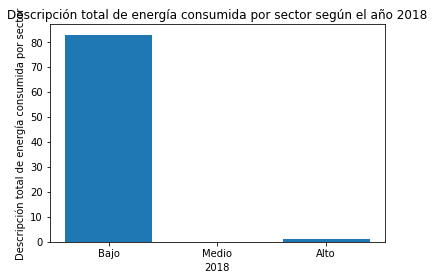

<Figure size 1080x2160 with 0 Axes>

In [235]:
eje_x = ("Bajo", "Medio", "Alto")
eje_y = gf1['descripcion'].tolist()

plt.bar(eje_x, eje_y)

##Leyenda en el eje y
plt.ylabel('Descripción total de energía consumida por sector')

##Leyenda en el eje x
plt.xlabel("2018")

##Titulo del Grafico
plt.title("Descripción total de energía consumida por sector según el año 2018")

##Tamano del grafico
plt.figure(figsize=(15,30))
plt.show()

,descripcion,2010,2011,2012,2013,2014,2015,2016,2017,2018,2018-bins
0,Descripción,0.013208,0.013337,0.013039,2013,2014,2015,0.011625,0.011406,0,bajo
1,Consumo final total,1.000000,1.000000,1.000000,156069,157966,164134,1.000000,1.000000,1,alto
2,Residencial,0.153647,0.146828,0.139895,21366,20603,20791,0.118906,0.116787,0,bajo
3,Servicios,0.040386,0.040370,0.040220,6246,6417,6671,0.040608,0.040575,0,bajo
4,Comercial,0.023085,0.023073,0.023564,3870,3980,4114,0.024831,0.024441,0,bajo
5,Público,0.025424,0.026203,0.027414,4296,4454,4575,0.027028,0.026522,0,bajo
6,Transporte,0.462078,0.478233,0.480301,74637,76186,81526,0.504789,0.503639,0,bajo
7,Industria,0.249671,0.245208,0.244587,38994,39206,38368,0.229092,0.226465,0,bajo
8,Agropecuario,0.018754,0.020506,0.021011,3273,3254,3327,0.020667,0.021268,0,bajo
9,Consumo no identificado (otros),0.008194,0.007335,0.006189,1008,1281,1346,0.007866,0.008443,0,bajo


In [81]:
gf2 = df_energia.groupby(['descripcion', '2018']).count()
gf2 = gf2.iloc[:,:1]
gf2

,,2010
descripcion,2018,
Agropecuario,0,1
Comercial,0,1
Consumo final total,1,1
Consumo no identificado (otros),0,1
Descripción,0,1
Industria,0,1
Público,0,1
Residencial,0,1
Servicios,0,1


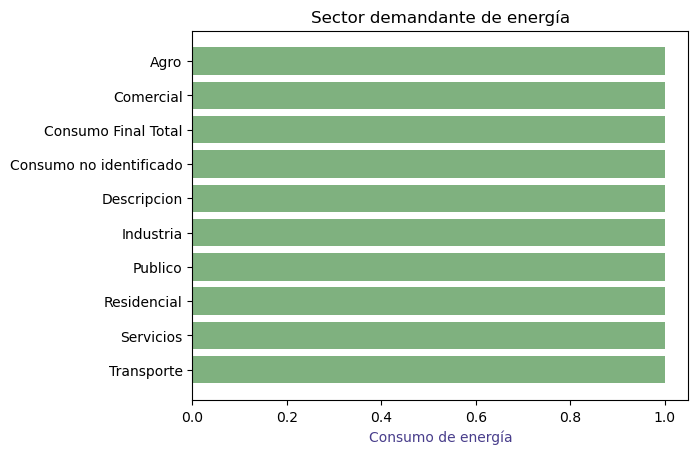

In [93]:
eje_x = ("Agro", "Comercial", "Consumo Final Total", "Consumo no identificado", "Descripcion", "Industria", "Publico", "Residencial", "Servicios", "Transporte")

eje_y = gf2['2010'].tolist() #grafico vertical es para cuando hay mas datos

plt.rcdefaults()
fig, ax = plt.subplots()


#Este se alimente de la lista eje_x

y_pos = np.arange(len(eje_x))

ax.barh(y_pos, eje_y, height=0.8, align='center', color='#006400', alpha=0.5) #alpha da transparencia a las barras


ax.set_yticks(y_pos, labels=eje_x, color= 'black')
ax.invert_yaxis() #labels read top to bottom
ax.set_xlabel('Consumo de energía').set_color('#483D8B')
ax.set_title('Sector demandante de energía')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
gf5 = df_energia.groupby(['descripcion']).count()
gf5 = gf5.iloc[:,:1]
gf5

A continuación se muestra una gráfica de disperción que representa la descripción total de energía consumida por sector según el año 2018.

In [69]:
df_energia[['descripcion', '2018']].head(10)


,descripcion,2018
0,Descripción,0
1,Consumo final total,1
2,Residencial,0
3,Servicios,0
4,Comercial,0
5,Público,0
6,Transporte,0
7,Industria,0
8,Agropecuario,0
9,Consumo no identificado (otros),0


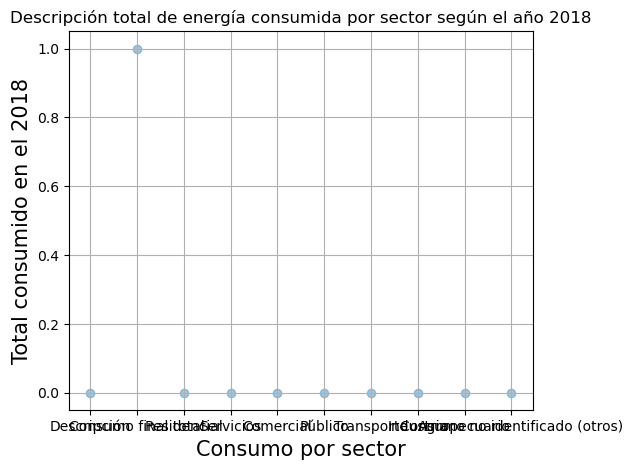

In [70]:
fig, ax = plt.subplots()

ax.scatter(df_energia['descripcion'],df_energia['2018'], alpha=0.4)

ax.set_xlabel("Consumo por sector", fontsize=15)

ax.set_ylabel("Total consumido en el 2018", fontsize=15)

ax.set_title('Descripción total de energía consumida por sector según el año 2018')

ax.grid(True)

fig.tight_layout()

plt.show()                                